In [141]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

## 1. 산림빅데이터 거래소 산림휴양복지통계

Q. 귀하는 일상형 산림휴양.복지활동의 주된 목적은 무엇입니까?

In [42]:
df1= pd.read_csv('../data/1-6번 질문.csv')
df1

,실태조사응답자일련번호,문항번호코드,답항코드
0,1,Q1-6,2
1,4,Q1-6,1
2,6,Q1-6,3
3,8,Q1-6,3
4,9,Q1-6,3
...,...,...,...
4200,5991,Q1-6,1
4201,5994,Q1-6,1
4202,5995,Q1-6,1
4203,5997,Q1-6,3


In [44]:
# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

plt.rcParams['font.family'] = 'NanumGothic'

In [43]:
df1['답항코드'].value_counts()

3       2346
1       1513
6        240
5         44
2         29
4         21
9997      12
Name: 답항코드, dtype: int64

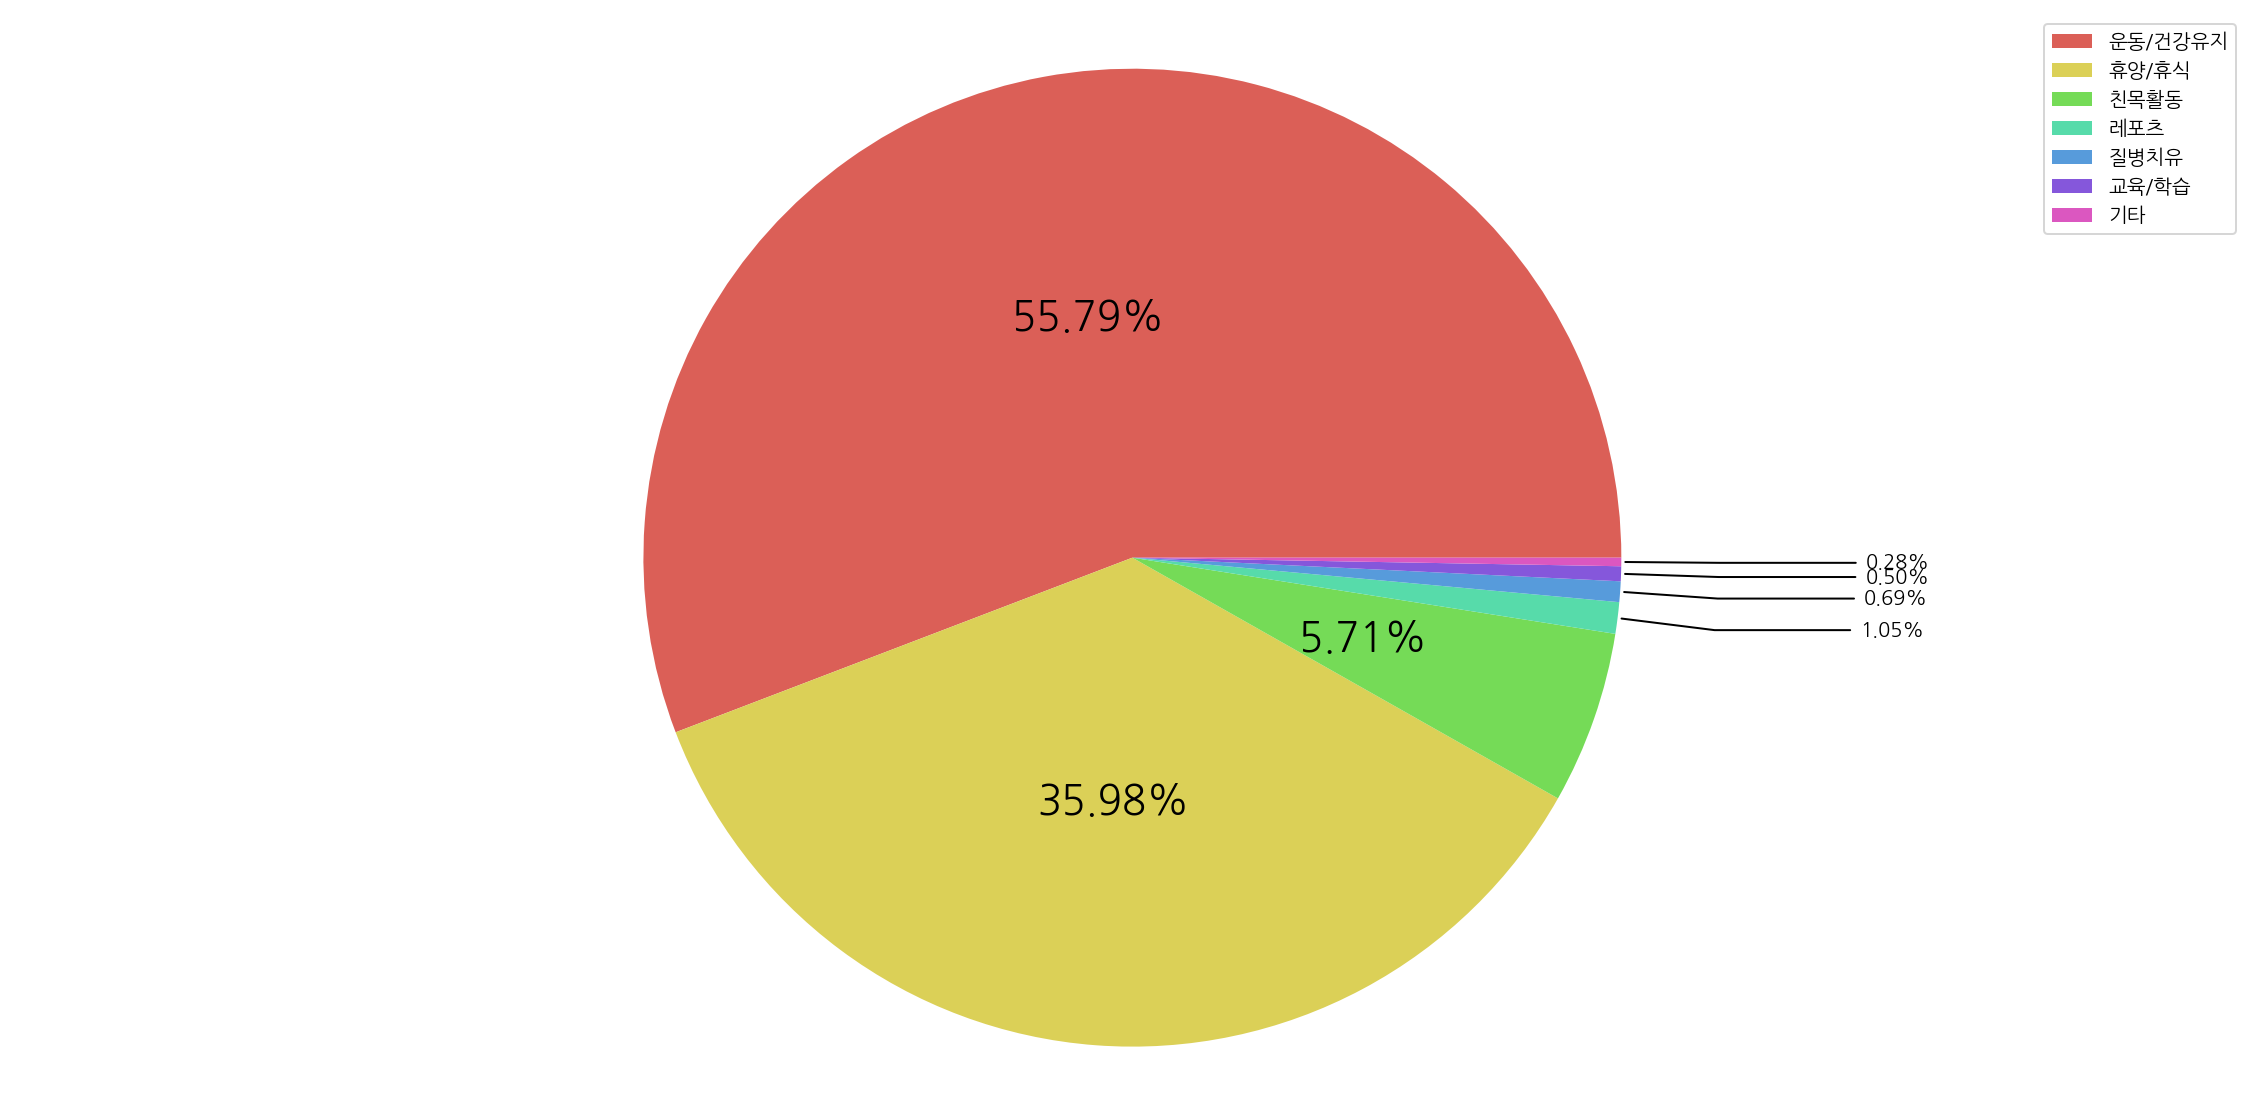

In [157]:
fig = plt.figure(figsize=(20,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성

frequency= [2346, 1513, 240, 44, 29, 21, 12]
total = np.sum(frequency) ## 빈도수 합

labels= ['운동/건강유지', '휴양/휴식', '친목활동', '레포츠', '질병치유', '교육/학습', '기타'] # 라벨
colors = sns.color_palette('hls',len(labels)) # 라벨의 개수 만큼 색상 리스트 생성
pie = plt.pie(num, colors=colors) # 파이차트 그리기

threshold = 5 ## 상한선 비율
sum_pct = 0 ## 퍼센티지

bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) ## annotation 박스 스타일

## annotation 설정
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')
 
for i,l in enumerate(labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 원의 중심 좌표와 반지름길이
    
    if i < len(labels) - 1:
        sum_pct += float(f'{frequency[i]/total*100:.2f}')
        text = f'{frequency[i]/total*100:.2f}%'
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        text = f'{100-sum_pct:.2f}%'
    
    ## 비율 상한선보다 작은 것들은 Annotation으로 만든다.
    if frequency[i]/total*100 < threshold:
        ang = (ang1+ang2)/2 ## 중심각
        x = np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
        y = np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표
        
        ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
        ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
        config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
        ax.annotate(text, xy=(x, y), xytext=(1.5*x, 1.2*y),
                    horizontalalignment=horizontalalignment, **config)
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        ax.text(x,y,text,ha='center',va='center',fontsize=20)

plt.legend(pie[0], labels, loc='upper right') # 범례만들기


plt.axis('equal')
plt.show()

# plt.savefig('./설문.png')

산림휴양,복지 활동의 목적에서 교육/학습은 0.28%로 매우 작았다.
산림휴양,복지 활동의 교육적 기능을 활용하기 위한 정책과 사업이 필요하다. 
산림교육 환경을 조성하고 생활밀착형 산림교육서비스 확대가 필요하다.

+산림의 교육적 가치에 대한 자료 제시하고
이러한 가치가 있는데 대부분이 운동과 휴식에만 집중되어있다. 그래서 우리가 숲세권 데이터를 활용해 생활밀착형 자연친화교육환경 조성 방안을 제시할거다. 

## 2. 산림빅데이터거래소 서울시 아파트 및 학교녹지 현황

In [125]:
df2= pd.read_csv('../data/서울시 아파트 및 학교녹지 현황(2019).csv', encoding='cp949')
df2.head()

,자치구,합계(개소),합계(면적),아파트 열린 녹지(개소),아파트 열린 녹지(면적),학교 공원화(개소),학교 공원화(면적),대학교 담장개방(개소),대학교 담장개방(면적)
0,합계,1340,1495807,210,232860,1107,1205040,23,57907
1,종로구,24,14794,-,-,23,13194,1,1600
2,중구,32,31211,1,310,30,30601,1,300
3,용산구,30,45504,1,600,29,44904,-,-
4,성동구,48,42313,9,4978,38,35735,1,1600


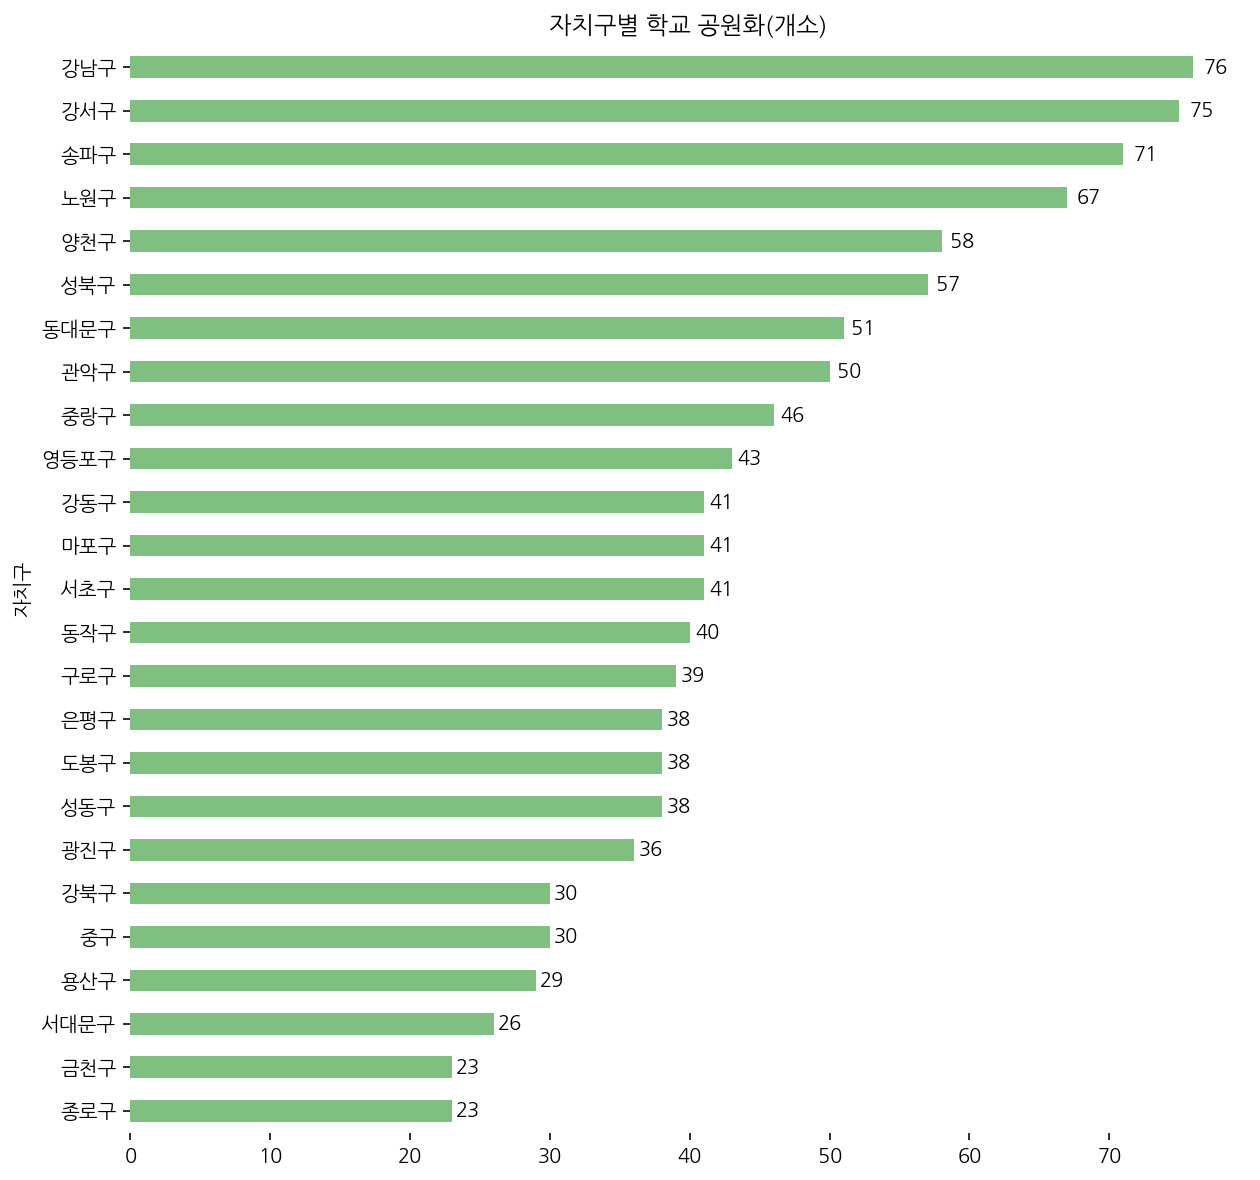

In [158]:
df2 = df2.astype({'학교 공원화(개소)': 'int'}) # 데이터 타입을 정수형으로
df3 = df2.drop([0]) # index 가 0인 합계 행을 제거
df3 = df3.sort_values(by=['학교 공원화(개소)'], ascending=True)
ax= df3.plot.barh(x='자치구', y='학교 공원화(개소)', 
                  rot=0, # 글자 회전
                  figsize=(10,10), # 표 사이즈
                  color='g', alpha=0.5, #초록색 연하게
                  legend=False, #범례 없애기
                  title="자치구별 학교 공원화(개소)" #타이틀
                 )
for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, "%d"%(width), va='center') # 값 그래프에 표시하기
plt.box(False)
plt.savefig('./자치구별학교공원.png')

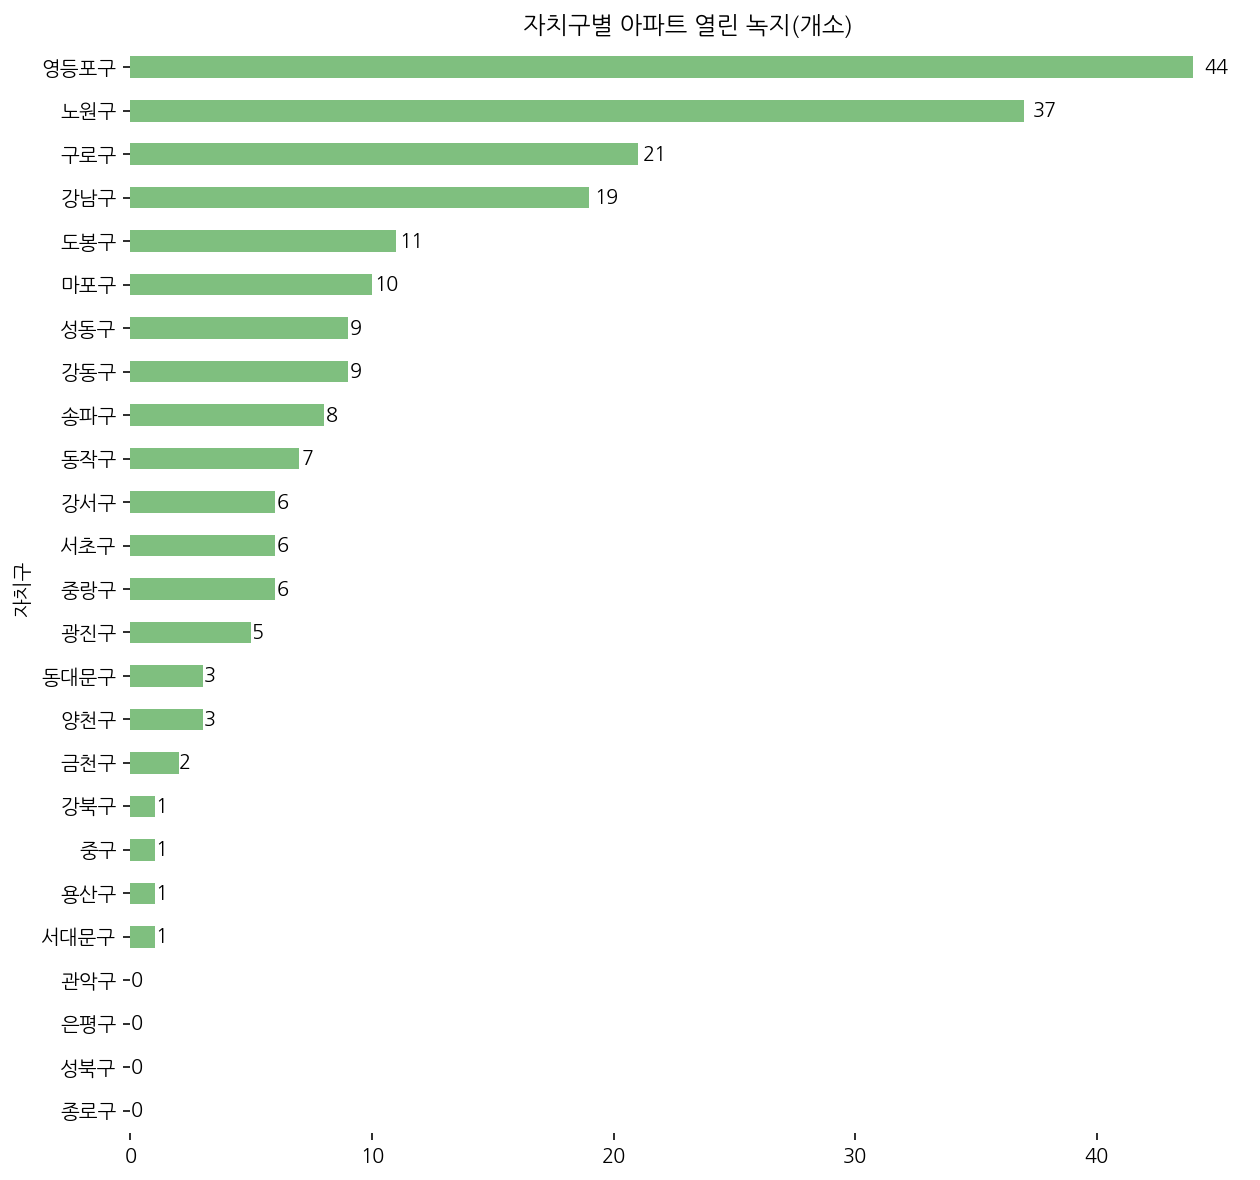

In [127]:
# df3['아파트 열린 녹지(개소)'] = df3['아파트 열린 녹지(개소)'].str.replace('-', '0') # str "-" 을 "0" 으로 바꾸기
df3 = df3.astype({'아파트 열린 녹지(개소)': 'int'}) # 데이터 타입을 정수형으로
df4 = df3.sort_values(by=['아파트 열린 녹지(개소)'], ascending=True) # 데이터 프레임 내립차순으로 정렬
ax1= df4.plot.barh(x='자치구', y='아파트 열린 녹지(개소)', 
                  rot=0, # 글자 회전
                  figsize=(10,10), # 표 사이즈
                  color='g', alpha=0.5, #초록색 연하게
                  legend=False, #범례 없애기
                  title="자치구별 아파트 열린 녹지(개소)" #타이틀
                 )
for p in ax1.patches:
    x, y, width, height = p.get_bbox().bounds
    ax1.text(width*1.01, y+height/2, "%d"%(width), va='center') # 값 그래프에 표시하기
plt.box(False)

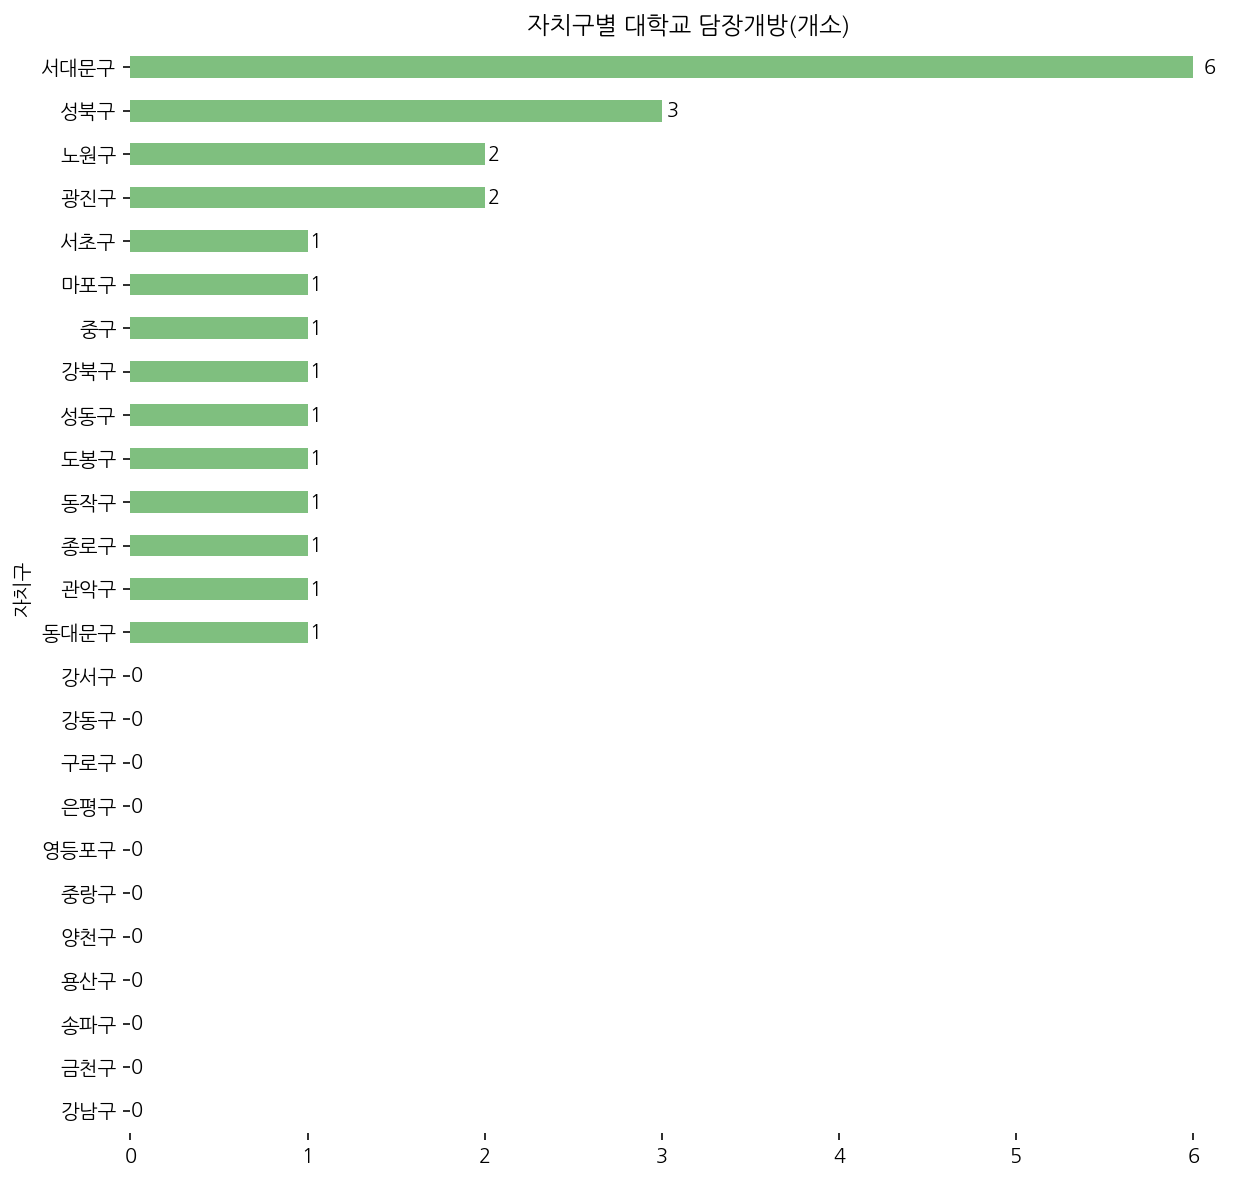

In [128]:
df3 = df3.astype({'대학교 담장개방(개소)': 'int'}) # 데이터 타입을 정수형으로
df5 = df3.sort_values(by=['대학교 담장개방(개소)'], ascending=True) # 데이터 프레임 내립차순으로 정렬
ax2 = df5.plot.barh(x='자치구', y='대학교 담장개방(개소)', 
                  rot=0, # 글자 회전
                  figsize=(10,10), # 표 사이즈
                  color='g', alpha=0.5, #초록색 연하게
                  legend=False, #범례 없애기
                  title="자치구별 대학교 담장개방(개소)" #타이틀
                 )
for p in ax2.patches:
    x, y, width, height = p.get_bbox().bounds
    ax2.text(width*1.01, y+height/2, "%d"%(width), va='center') # 값 그래프에 표시하기
plt.box(False)

자치구별 학교 공원화, 아파트 열린 녹지, 대학교 담장개방 개수 시각화  
공원이나 숲 아니더라도 녹지 확대 가능한 경우임.

학교공원화사업은 학교운동장 주변과 유휴공지에 나무를 심어 학생 정서순화에 기여하고, 담장개방으로 지역주민을 위한 녹지 및 공원으로 활용할 수 있도록 지난 99년부터 연차적으로 추진됐다.
https://www.localnaeil.com/News/View/101926

도심내 부족한 녹지공간을 확충하고 학생들의 정서함량과 자연친화적인 학습공간 제공을 목적으로 함